# Building the CNN

In [12]:
# Import the standard libraries
import numpy as np
import pandas as pd

In [13]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "" # CPU만 사용할 경우 설정

In [14]:
# Define the constance

FOLDER_ = 'Casting CNN'
BATCH_SIZE_ = 16
COLOR_SPECTRUM_ = (1)          # 1 if B&W, 3 if color
IMG_SIZE_ = (300, 300)

In [15]:
# import Keras Modules
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [16]:
# Initialize the CNN

classifier = Sequential()

### Discussion: Image Size
As (i.) we are working with a GPU and (ii.) the image are quite small (300x300 px), we can use Input = Image size.

In [17]:
# Adding the layers
input_shape_ = (300,300) + (COLOR_SPECTRUM_, )
classifier.add(Conv2D(BATCH_SIZE_, (3,3), input_shape=input_shape_, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Add a second layer
classifier.add(Conv2D(BATCH_SIZE_, (3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Flattening
classifier.add(Flatten())

In [18]:
# ANN Layer

# Add a second hidden layer
classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dropout(rate=.2))

# Add a second hidden layer
classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dropout(rate=.2))

# Add a third hidden layer
classifier.add(Dense(units = 64, activation='relu'))
classifier.add(Dropout(rate=.2))

classifier.add(Dense(units = 1, activation='sigmoid'))

In [19]:
classifier.compile(optimizer= 'adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

## Importing images

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=25)

test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
from pathlib import Path

dataset_folder =  Path('C:/Users/user/머신러닝 분석대상/검토/Casting product image data for quality inspection - 이미지/casting_data')

if dataset_folder.exists():
    print(f'[-------]\nConnect the dataset folder at \n\t{str(dataset_folder)}\n[-------]')
else:
    print(f'[*******]\nConnecting the dataset folder failed \n[*******]')


[-------]
Connect the dataset folder at 
	C:\Users\user\머신러닝 분석대상\검토\Casting product image data for quality inspection - 이미지\casting_data
[-------]


In [22]:
training_files = dataset_folder / 'train/'
test_files = dataset_folder / 'test/'

training_set= train_datagen.flow_from_directory(
        training_files,
        target_size=(300,300),
        batch_size=BATCH_SIZE_,
        class_mode='binary',
        color_mode="grayscale")

test_set = test_datagen.flow_from_directory(
        test_files,
        target_size= (300,300),
        batch_size=BATCH_SIZE_,
        class_mode='binary',
        color_mode="grayscale")

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


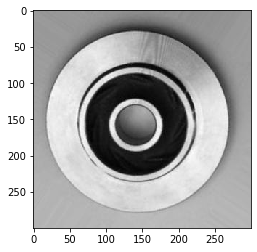

In [27]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
plt.imshow(imread('C:/Users/user/머신러닝 분석대상/검토/Casting product image data for quality inspection - 이미지/casting_data/train/ok_front/cast_ok_0_1.jpeg'))

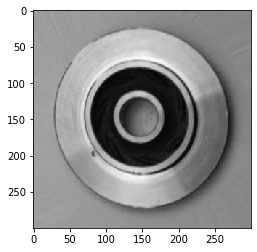

In [29]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
plt.imshow(imread('C:/Users/user/머신러닝 분석대상/검토/Casting product image data for quality inspection - 이미지/casting_data/train/def_front/cast_def_0_0.jpeg'))

In [12]:
training_size = len(training_set)
test_size = len(test_set)

print(f'{training_size} * {BATCH_SIZE_} = {training_size * BATCH_SIZE_}')
print(f'{test_size} * {BATCH_SIZE_} = {test_size * BATCH_SIZE_}')

415 * 16 = 6640
45 * 16 = 720


In [13]:
# get the number of CPU threads

import multiprocessing
import tensorflow as tf

def set_workers(local = False):
    
    catcha =''
    workers = multiprocessing.cpu_count()
    
    if local:
        workers -= 1 
        catcha = 'locally '
        
    gpus = tf.config.experimental.list_physical_devices('GPU')

    print(f"Working with {workers} CPU threads {catcha}and with {len(gpus)} GPU" )
    
    return workers

workers_ = set_workers()


Working with 12 CPU threads and with 1 GPU


In [14]:
classifier.fit_generator(
        training_set,
        steps_per_epoch=training_size,
        epochs=25,
        validation_data=test_set,
        validation_steps=test_size,
        use_multiprocessing=False,
        workers=workers_)

Epoch 1/25
415/415 [==============================] - 277s 667ms/step - loss: 0.6546 - accuracy: 0.6207 - val_loss: 0.1791 - val_accuracy: 0.7916
Epoch 2/25
415/415 [==============================] - 256s 616ms/step - loss: 0.3954 - accuracy: 0.8155 - val_loss: 0.5580 - val_accuracy: 0.8112
Epoch 3/25
415/415 [==============================] - 261s 628ms/step - loss: 0.2866 - accuracy: 0.8807 - val_loss: 0.0117 - val_accuracy: 0.9315
Epoch 4/25
415/415 [==============================] - 265s 639ms/step - loss: 0.2218 - accuracy: 0.9085 - val_loss: 0.1752 - val_accuracy: 0.8657
Epoch 5/25
415/415 [==============================] - 250s 602ms/step - loss: 0.1931 - accuracy: 0.9192 - val_loss: 0.1834 - val_accuracy: 0.9301
Epoch 6/25
415/415 [==============================] - 202s 487ms/step - loss: 0.1513 - accuracy: 0.9395 - val_loss: 0.0415 - val_accuracy: 0.9371
Epoch 7/25
415/415 [==============================] - 131s 315ms/step - loss: 0.1753 - accuracy: 0.9311 - val_loss: 0.0725 -

In [15]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 16)      2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 85264)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               10913920  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

## Performance review

### Training performance

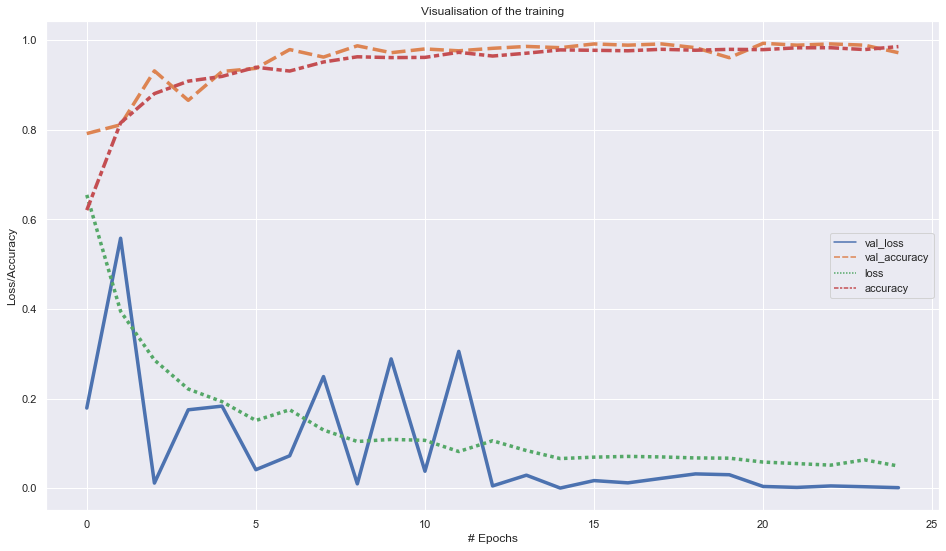

In [16]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (16,9)
sns.set(style="darkgrid")

data = pd.DataFrame(classifier.history.history)

plt.title('Visualisation of the training')
plt.ylabel('Loss/Accuracy')
plt.xlabel('# Epochs')
sns.lineplot(data=data, linewidth=3.5)

### Confusion Matrix

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

test_set.reset
y_pred = classifier.predict_generator(generator = test_set, 
                                      steps = test_size,
                                      use_multiprocessing=False,
                                        workers=workers_)

y_pred = y_pred >= 0.5

print("[------]\nConfusion Matrix")
print(confusion_matrix(test_set.classes[test_set.index_array], y_pred))
print("[------]")

[------]
Confusion Matrix
[[266 187]
 [167  95]]
[------]


In [18]:
target_names = ['Defective parts', 'Good parts']

print('[------]\nClassification Report')
print(classification_report(test_set.classes[test_set.index_array], y_pred, target_names=target_names))
print("[------]")

[------]
Classification Report
                 precision    recall  f1-score   support

Defective parts       0.61      0.59      0.60       453
     Good parts       0.34      0.36      0.35       262

       accuracy                           0.50       715
      macro avg       0.48      0.47      0.47       715
   weighted avg       0.51      0.50      0.51       715

[------]


In [30]:
import torch.nn as nn
from torch.nn.modules.module import Module
import torch.nn.functional as F
from torchsummary import summary
import torch


class Flatten(Module):
    __constants__ = ['start_dim', 'end_dim']

    def __init__(self, start_dim=1, end_dim=-1):
        super(Flatten, self).__init__()
        self.start_dim = start_dim
        self.end_dim = end_dim

    def forward(self, input):
        return input.flatten(self.start_dim, self.end_dim)


class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, 3, stride=1)
        self.conv2 = nn.Conv2d(16, 16, 3, stride=1)

        self.fc1 = nn.Linear(73 * 73 * 16, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)

        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = Flatten()
        self.drop_out = nn.Dropout(0.2)


    def forward(self, img):
        output = self.conv1(img)
        output = self.maxpool(self.relu(output))
        output = self.conv2(output)
        output = self.maxpool(self.relu(output))
        output = self.flatten(output)
        output = self.drop_out(output)
        output = self.fc1(output)
        output = self.relu(output)
        output = self.drop_out(output)
        output = self.fc2(output)
        output = self.relu(output)
        output = self.drop_out(output)
        output = self.fc3(output)
        output = self.relu(output)
        output = self.drop_out(output)
        output = self.fc4(output)

        return torch.sigmoid(output)

    def summary(self):
        summary(self, (1, 300, 300))


class CustomMLP(nn.Module):

    def __init__(self):
        super(CustomMLP, self).__init__()
        self.linear1 = nn.Linear(300 * 300 * 3, 78)
        self.dropout = nn.Dropout(0.5)
        self.act = nn.ReLU()
        self.linear2 = nn.Linear(78, 10)

    def forward(self, img):
        img = img.view(-1, 300 * 300 * 3)
        output = F.relu(self.linear1(img))
        output = self.linear2(output)
        return output

    def summary(self):
        summary(self, (1, 300, 300, 3))


# if __name__ == "__main__":
#     from torchsummary import summary

#     summary(CNN(), (3, 300, 300))
#     summary(CustomMLP(), (3, 300, 300))


In [24]:
import os
from glob import glob
from torch.utils.data.dataset import Dataset
import torchvision
from PIL import Image


# import some packages you need here

class product_image(Dataset):

    def __init__(self, data_dir, transform):
        self.data_dir = glob(os.path.join(data_dir, "*.jpeg"))
        self.transform = transform

    def __len__(self):
        return len(self.data_dir)

    def __getitem__(self, idx):
        filepath = self.data_dir[idx]
        label = filepath.split('\\')[-1].split("_")[1]
        img = Image.open(filepath)

        if self.transform:
            img = self.transform(img)

        if label == 'def':
            label_int = 1
        else:
            label_int = 0

        return img, label_int


if __name__ == "__main__":
    from torchvision.transforms import transforms
    from torch.utils.data.dataloader import DataLoader

    dir = "dataset/train"
    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor()
    ])

    trainset = product_image(data_dir=dir, transform=transform)
    train_loader = DataLoader(trainset,batch_size=16,shuffle=True,num_workers=0)
    for img,label_int in train_loader:
        print(img)
        print(label_int)
        import sys; sys.exit(0)


tensor([[[[0.8510, 0.8471, 0.8431,  ..., 0.6824, 0.6745, 0.6706],
          [0.8510, 0.8510, 0.8471,  ..., 0.6745, 0.6706, 0.6706],
          [0.8510, 0.8510, 0.8510,  ..., 0.6706, 0.6706, 0.6667],
          ...,
          [0.8078, 0.8000, 0.7922,  ..., 0.6392, 0.6314, 0.6275],
          [0.8000, 0.7922, 0.7843,  ..., 0.6392, 0.6353, 0.6314],
          [0.7882, 0.7843, 0.7804,  ..., 0.6431, 0.6353, 0.6392]],

         [[0.8510, 0.8471, 0.8431,  ..., 0.6824, 0.6745, 0.6706],
          [0.8510, 0.8510, 0.8471,  ..., 0.6745, 0.6706, 0.6706],
          [0.8510, 0.8510, 0.8510,  ..., 0.6706, 0.6706, 0.6667],
          ...,
          [0.8078, 0.8000, 0.7922,  ..., 0.6392, 0.6314, 0.6275],
          [0.8000, 0.7922, 0.7843,  ..., 0.6392, 0.6353, 0.6314],
          [0.7882, 0.7843, 0.7804,  ..., 0.6431, 0.6353, 0.6392]],

         [[0.8510, 0.8471, 0.8431,  ..., 0.6824, 0.6745, 0.6706],
          [0.8510, 0.8510, 0.8471,  ..., 0.6745, 0.6706, 0.6706],
          [0.8510, 0.8510, 0.8510,  ..., 0

SystemExit: 0

In [ ]:
!nvidia-smi

model = CNN, total epoch : 25
epoch = 1 


Train set: Average loss: 0.0374,Train Accuracy: 4325/6633 (65.2%)

Finished Training Trainset

Test set: Average loss: 0.0181,Test Accuracy: 628/715 (87.8%)

Finished Testing Test set
epoch = 2 


Train set: Average loss: 0.0200,Train Accuracy: 5665/6633 (85.4%)

Finished Training Trainset

Test set: Average loss: 0.0120,Test Accuracy: 647/715 (90.5%)

Finished Testing Test set
epoch = 3 


Train set: Average loss: 0.0140,Train Accuracy: 5972/6633 (90.0%)

Finished Training Trainset

Test set: Average loss: 0.0086,Test Accuracy: 661/715 (92.4%)

Finished Testing Test set
epoch = 4 


Train set: Average loss: 0.0107,Train Accuracy: 6142/6633 (92.6%)

Finished Training Trainset

Test set: Average loss: 0.0083,Test Accuracy: 671/715 (93.8%)

Finished Testing Test set
epoch = 5 


Train set: Average loss: 0.0088,Train Accuracy: 6275/6633 (94.6%)

Finished Training Trainset

Test set: Average loss: 0.0036,Test Accuracy: 702/715 (98.2%)

Finished Te

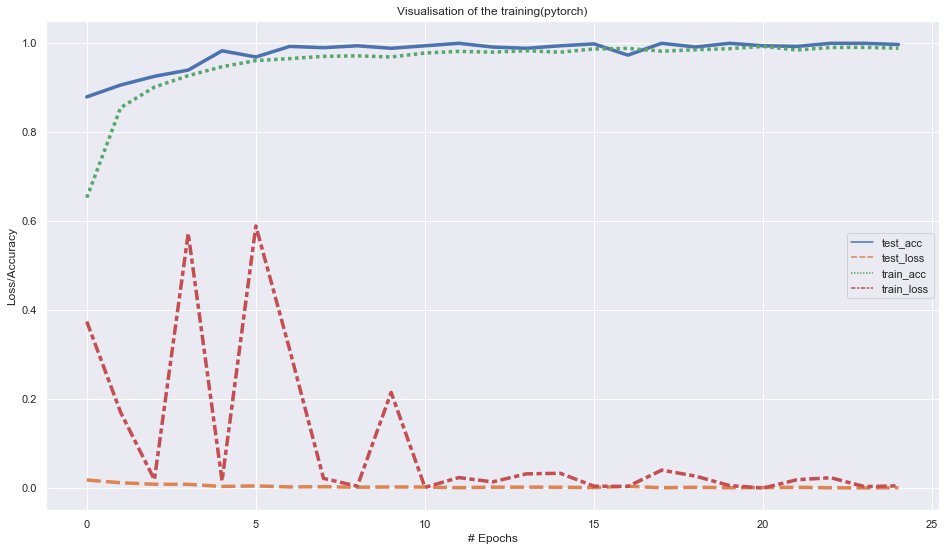

In [31]:
import torch
import pandas as pd
import torch.nn as nn
import seaborn as sns
from time import time
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
from torch.utils.data.dataloader import DataLoader

def train(model, trn_loader, device, criterion, optimizer, batch_size):
    model.train()
    model.to(device)
    trn_loss = 0
    acc_sum = 0
    trn_loss_sum = 0

    for i, (data, target) in enumerate(trn_loader):  # i means how many
        # times trained model
        # data, target type is tensor
        optimizer.zero_grad()  # pytorch has gradient before nodes
        data = data.to(device)  # gramma caution
        output = model(data)  # input data in model
        target = target.type("torch.FloatTensor")  # using BCELoss
        target = target.to(device)
        target = target.reshape(output.shape)
        trn_loss = criterion(output, target)  # cost fcn is Binary_Cross_entropy
        trn_loss.backward()  # backpropagation
        optimizer.step()  # training model
        trn_loss_sum += trn_loss

        # accuracy
        pred = output.data.round()
        acc = pred.eq(target.data.view_as(pred)).sum()
        acc_sum += acc

    trn_loss_sum /= len(trn_loader.dataset)
    trn_acc = 100. * int(acc_sum) / len(trn_loader.dataset)
    print('\nTrain set: Average loss: {:.4f},Train Accuracy: {}/{} ({:.1f}%)\n'
          .format(trn_loss_sum, acc_sum, len(trn_loader.dataset), trn_acc))
    print('Finished Training Trainset')

    return trn_loss, trn_acc


def test(model, tst_loader, device, criterion):
    model.eval()
    model.to(device)
    tst_loss = 0
    acc = 0
    acc_sum = 0
    with torch.no_grad():
        for data, target in tst_loader:
            data = data.to(device)
            output = model(data)
            target = target.type("torch.FloatTensor")  # using BCELoss
            target = target.to(device)
            target = target.reshape(output.shape)
            tst_loss += criterion(output, target)
            pred = output.round()
            acc += pred.eq(target.data.view_as(pred)).sum()
            acc_sum += acc

    tst_loss /= len(tst_loader.dataset)
    tst_acc = 100. * int(acc) / len(tst_loader.dataset)
    # import ipdb;ipdb.set_trace()
    print('\nTest set: Average loss: {:.4f},Test Accuracy: {}/{} ({:.1f}%)\n'
          .format(tst_loss, acc, len(tst_loader.dataset), tst_acc))
    print('Finished Testing Test set')
    return tst_loss, tst_acc


def main():
    start = time()

    transform = transforms.Compose([
        transforms.Resize((300, 300)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(25),
        transforms.ToTensor()
    ])

    batch_size = 16
    train_dataset_dir = "dataset/train"
    test_dataset_dir = "dataset/test"

    train_dataset = product_image(data_dir=train_dataset_dir,
                                  transform=transform)

    test_dataset = product_image(data_dir=test_dataset_dir,
                                 transform=transform)

    trn_loader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=0)
    tst_loader = DataLoader(test_dataset, batch_size, shuffle=False, num_workers=0)

    # using cpu
    device = torch.device('cpu' if torch.cuda.is_available() else 'cuda:0')

    # using gpu
    # device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

    # loss function
    criterion = nn.BCELoss()
    epoch = 25

    # CNN
    model = CNN()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    CNN_train_loss_list = []
    CNN_train_acc_list = []
    CNN_test_loss_list = []
    CNN_test_acc_list = []

    print("model = CNN, total epoch : {}".format(epoch))
    for j in range(epoch):
        print("epoch = {} \n".format(j + 1))
        trainer = train(model, trn_loader, device, criterion, optimizer, batch_size)
        CNN_train_loss_list.append(trainer[0].item())
        CNN_train_acc_list.append(trainer[1])
        testor = test(model, tst_loader, device, criterion)
        CNN_test_loss_list.append(testor[0].item())
        CNN_test_acc_list.append(testor[1])
    test(model, tst_loader, device, criterion)

    train_acc = pd.DataFrame(CNN_train_acc_list) / 100
    train_loss = pd.DataFrame(CNN_train_loss_list)
    test_acc = pd.DataFrame(CNN_test_acc_list) / 100
    test_loss = pd.DataFrame(CNN_test_loss_list)
    measure = pd.concat([test_acc, test_loss, train_acc, train_loss], axis=1, keys= ['test_acc','test_loss','train_acc','train_loss'])
    

    plt.rcParams["figure.figsize"] = (16, 9)
    sns.set(style="darkgrid")

    plt.title('Visualisation of the training(pytorch)')
    plt.ylabel('Loss/Accuracy')
    plt.xlabel('# Epochs')
    sns.lineplot(data=measure, linewidth=3.5)

    print(measure)


if __name__ == '__main__':
    main()
